In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

In [2]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)

In [3]:

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/MSCCSE/CSE718/CSE718_Project/survey.csv'
data = pd.read_csv(file_path)
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave m

In [4]:
data.shape

(1259, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data.describe()

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


In [7]:
data.shape[0]-data.count()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
100*((data.shape[0]-data.count())/data.shape[0])

Timestamp                    0.00
Age                          0.00
Gender                       0.00
Country                      0.00
state                       40.91
self_employed                1.43
family_history               0.00
treatment                    0.00
work_interfere              20.97
no_employees                 0.00
remote_work                  0.00
tech_company                 0.00
benefits                     0.00
care_options                 0.00
wellness_program             0.00
seek_help                    0.00
anonymity                    0.00
leave                        0.00
mental_health_consequence    0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
mental_health_interview      0.00
phys_health_interview        0.00
mental_vs_physical           0.00
obs_consequence              0.00
comments                    86.97
dtype: float64

In [9]:
data_missing = pd.DataFrame(index = data.columns.values)
data_missing['Null'] = data.isnull().sum().values
data_missing

,Null
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [10]:
data_missing['Null'] = data.isnull().sum().values
data_missing

,Null
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [11]:
data.duplicated().any()

False

In [12]:
#Lets try to plot Age vs Treatment
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

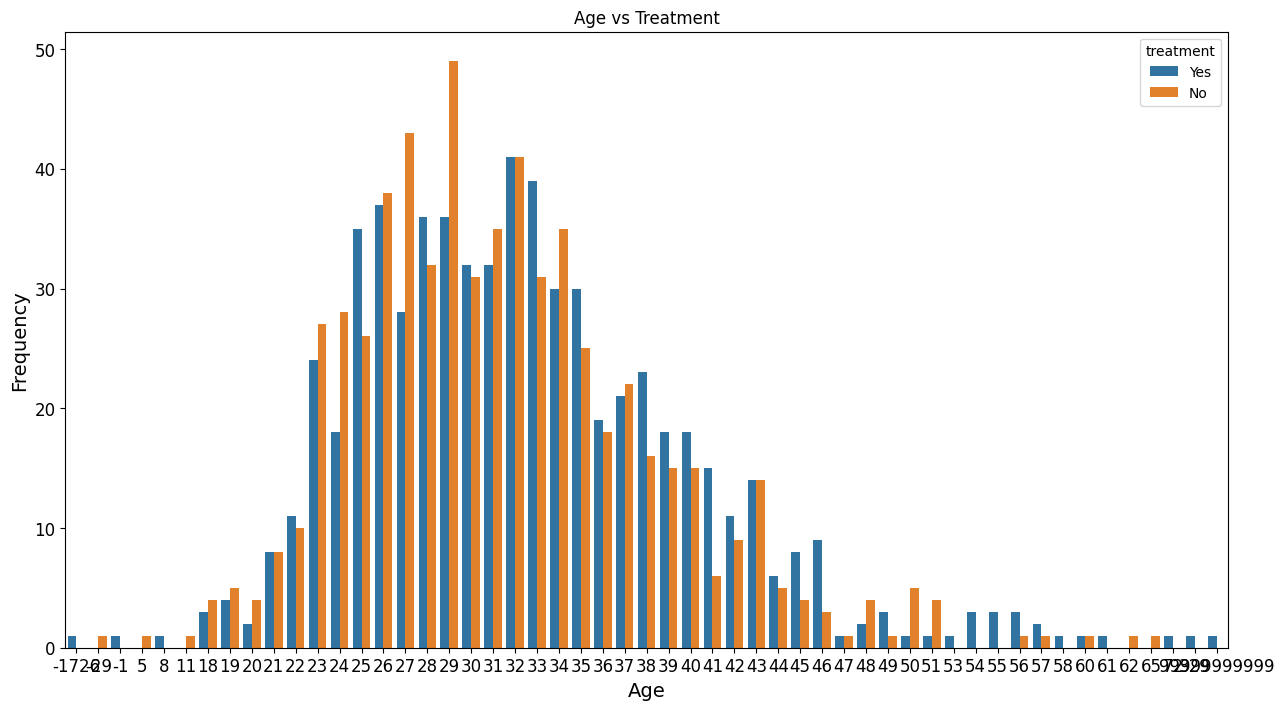

In [13]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='treatment', data=data)

plt.title(label='Age vs Treatment', size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()

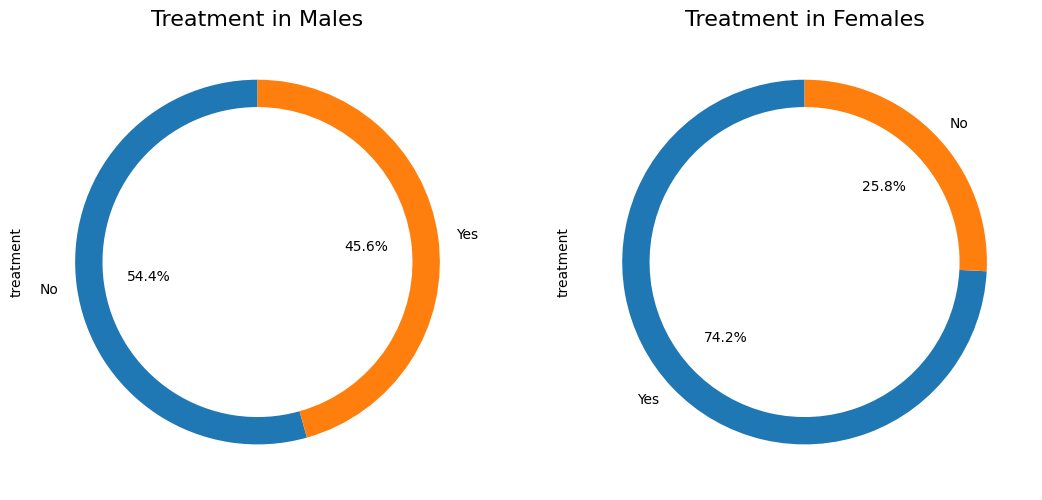

In [14]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
data['treatment'][data['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
data['treatment'][data['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)


plt.show()

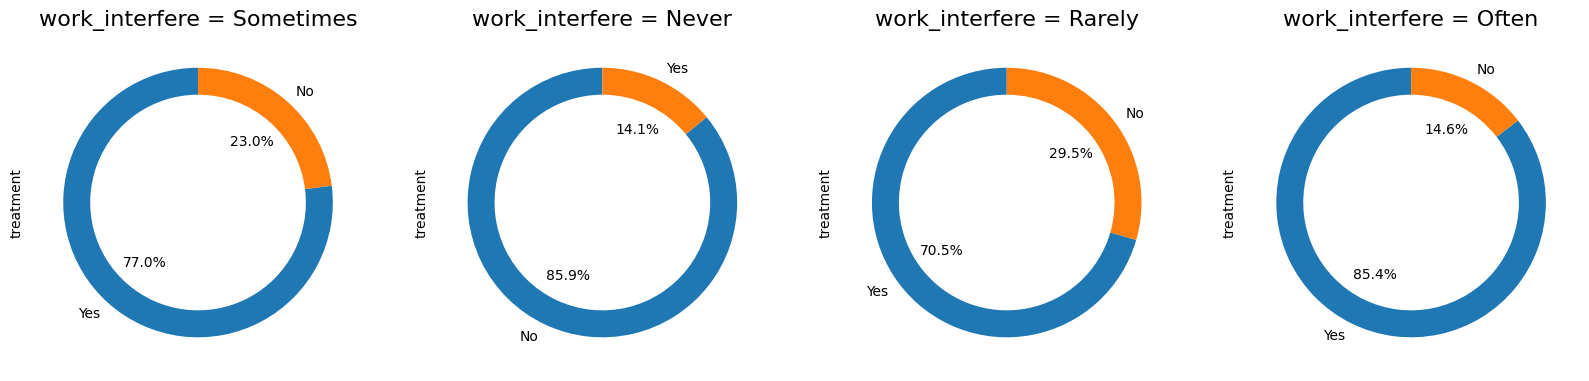

In [15]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,4,1)
data['treatment'][data['work_interfere'] == 'Sometimes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Sometimes', size=16)

plt.subplot(1,4,2)
data['treatment'][data['work_interfere'] == 'Never'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Never', size=16)

plt.subplot(1,4,3)
data['treatment'][data['work_interfere'] == 'Rarely'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Rarely', size=16)

plt.subplot(1,4,4)
data['treatment'][data['work_interfere'] == 'Often'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Often', size=16)

plt.show()

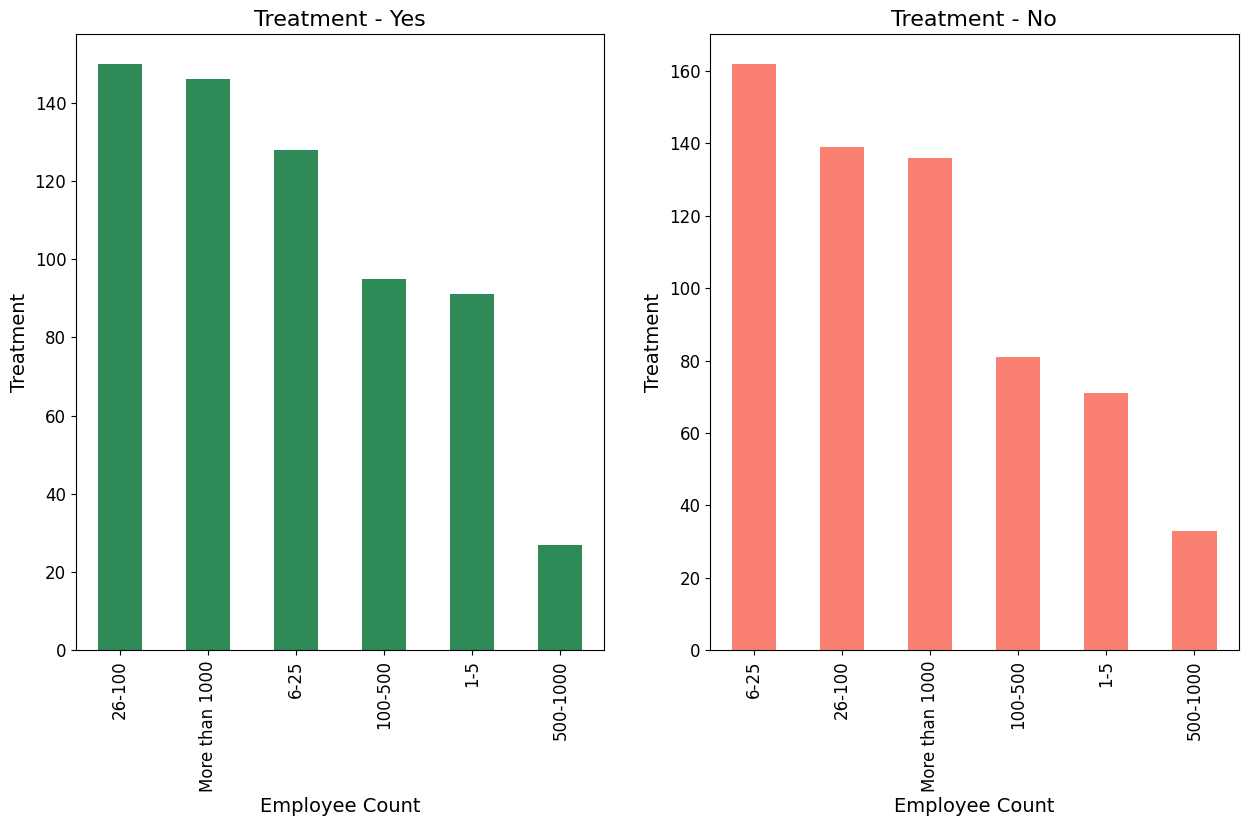

In [16]:
figure = plt.figure(figsize=(15,8))

plt.subplot(1,2,1)

data[data['treatment'] == 'Yes']['no_employees'].value_counts().plot.bar(color='seagreen')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Treatment - Yes', size=16)


plt.subplot(1,2,2)

data[data['treatment'] == 'No']['no_employees'].value_counts().plot.bar(color='salmon')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Treatment - No', size=16)

plt.show()


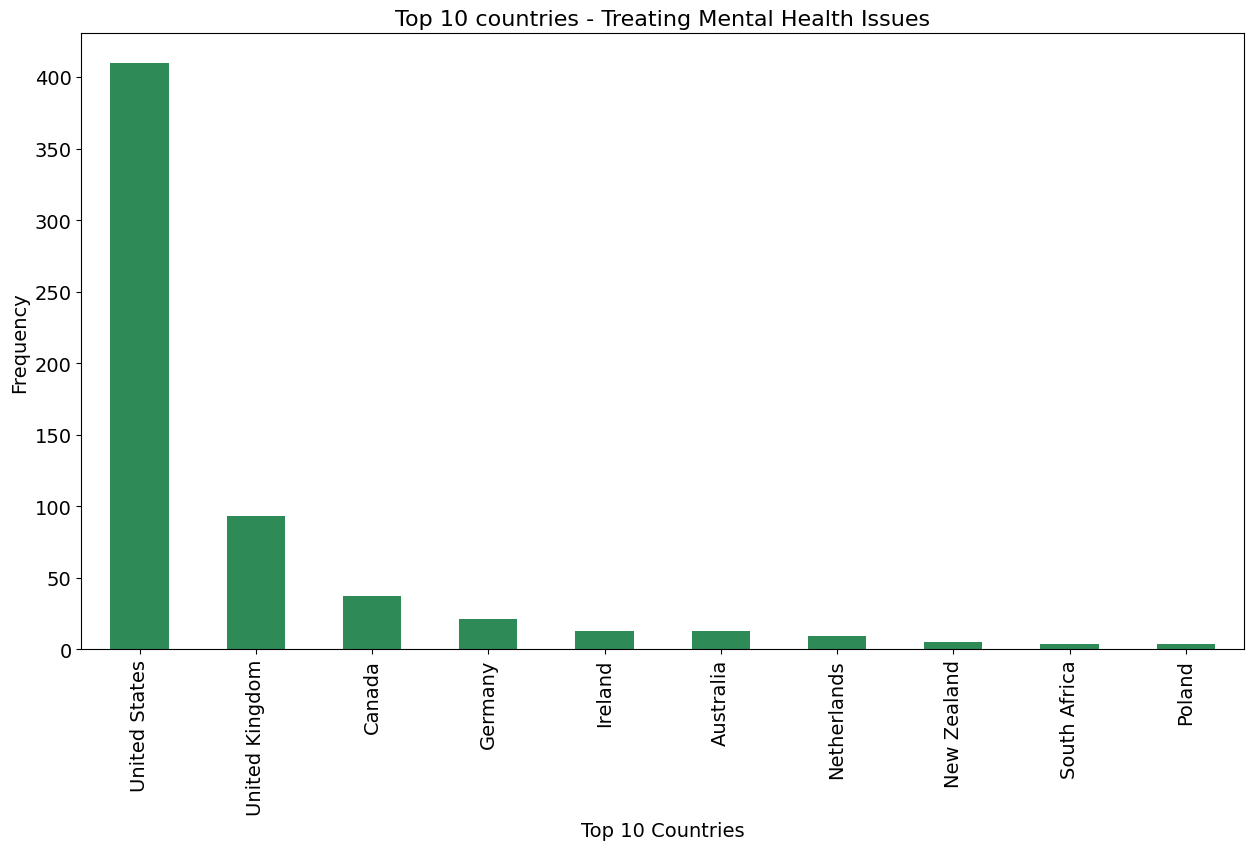

In [17]:
fig = plt.figure(figsize=[15,8])

data[data['treatment']== 'Yes']['Country'].value_counts().head(10).plot.bar(color='seagreen')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Treating Mental Health Issues', size=16)

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

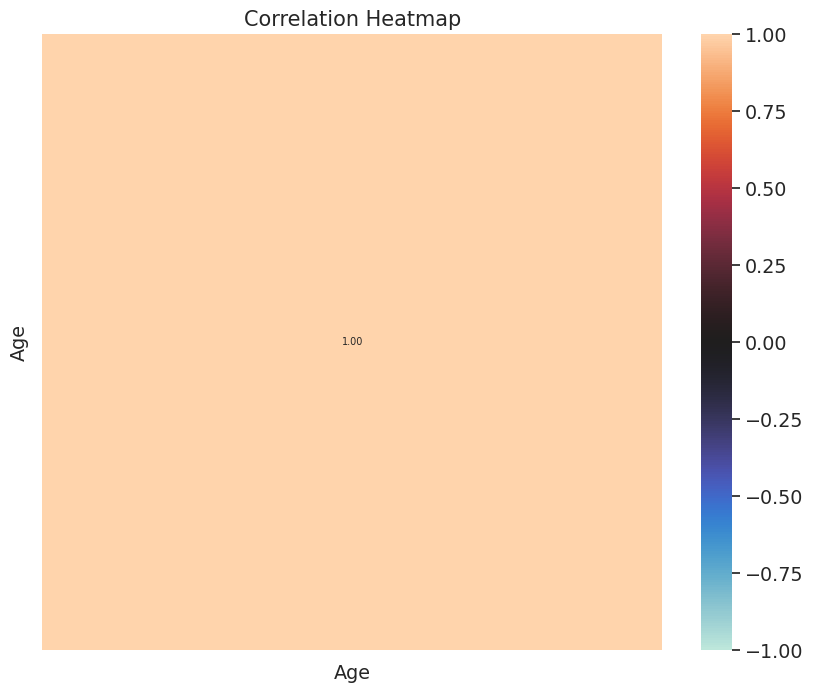

In [18]:
matrix= data.corr().round(2)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.25)
plot = sns.heatmap(matrix,annot = True,vmin= -1 , vmax= 1 , center= 0,fmt='.2f', annot_kws={'size': 7})
plt.title('Correlation Heatmap')

In [19]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [20]:
data.drop(['comments','state','Timestamp'], axis=1, inplace=True)



In [27]:
Gender= data['Gender'].unique()
for i ,j in data.iterrows():
    if j['Gender'] == 'A little about you'or j['Gender'] =='p':
        data.drop(i, inplace= True)

In [29]:
data['self_employed'].fillna('NaN',inplace= True)
data['work_interfere'].fillna('NaN',inplace= True)

In [31]:
data['self_employed']= data['self_employed'].replace('NaN','No')
data['self_employed'].unique()

array([2, 1, 0])

In [32]:
data['work_interfere']= data['work_interfere'].replace('NaN', 'Don\tknow')
data['work_interfere'].unique()

array([-0.97272994, -0.24462828, -1.70083161,  0.48347339,  1.21157505])

In [34]:
data['Age'].unique()
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>99].index, inplace = True)

print(data['Age'].unique())

[3.70e-10 4.40e-10 3.20e-10 3.10e-10 3.30e-10 3.50e-10 3.90e-10 4.20e-10
 2.30e-10 2.90e-10 3.60e-10 2.70e-10 4.60e-10 4.10e-10 3.40e-10 3.00e-10
 4.00e-10 3.80e-10 5.00e-10 2.40e-10 1.80e-10 2.80e-10 2.60e-10 2.20e-10
 1.90e-10 2.50e-10 4.50e-10 2.10e-10 4.30e-10 5.60e-10 6.00e-10 5.40e-10
 3.29e-09 5.50e-10 1.00e+00 4.80e-10 2.00e-10 5.70e-10 5.80e-10 4.70e-10
 6.20e-10 5.10e-10 6.50e-10 4.90e-10 5.00e-11 5.30e-10 6.10e-10 8.00e-11
 1.10e-10 7.20e-10]


In [35]:
X = data.drop(columns= ['treatment'])
X.shape

(1256, 23)

In [36]:
y= data['treatment']
y.shape

(1256,)

In [37]:
le = LabelEncoder()
column_to_encode = ['Gender','Country','care_options','seek_help','wellness_program','self_employed','family_history', 'treatment','work_interfere','no_employees','remote_work', 'tech_company','benefits','anonymity','leave', 'mental_health_consequence','phys_health_consequence','coworkers','phys_health_interview','mental_vs_physical','obs_consequence','mental_vs_physical','supervisor','mental_health_interview']
for column in column_to_encode:
    data[column] = le.fit_transform(data[column])

In [38]:
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])
data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [40]:
# KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train,y_train)
y_= classifier.predict(X_test.values)
print('KNN accuracy :', accuracy_score(y_true=y_test, y_pred=y_)*100)

KNN accuracy : 64.96815286624204


In [41]:
#RandomForestClassifier
steps_rfc = [('Scaler', StandardScaler()),
             ('clf', RFC(n_estimators = 40))]
clf_rfc = Pipeline(steps=steps_rfc)
clf_rfc.fit(X_train, y_train)
y_pred_rfc = clf_rfc.predict(X_test)
print('RFC accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_rfc)*100)

RFC accuracy:  79.29936305732484


In [42]:
# SupportVectorClassification Model
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]
clf_svc = Pipeline(steps = steps_svc)
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
print('SVC accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

SVC accuracy : 73.56687898089172


In [43]:
# DecisionTreeClassifier
classifier = DT()
classifier.fit(X_train,y_train)
accuracy = classifier.score(X_test,y_test)
Accuracy = accuracy*100
Accuracy

76.75159235668791